<a href="https://colab.research.google.com/github/KhalidEl-MariAa/Heart_diseases_prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import our data

In [2]:
daata = pd.read_csv('/content/heart.csv')
daata.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Explore data and needed preprocessing steps


Data frame shape

In [3]:
daata.shape

(1025, 14)

missing values

In [4]:
daata.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

duplicated values

In [5]:
daata.duplicated().sum()

723

In [6]:
cleaned_data= daata.drop_duplicates()

In [7]:
cleaned_data.duplicated().sum()

0

In [8]:
cleaned_data.shape

(302, 14)

In [9]:
cleaned_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Catogrical columns and Continous columns

In [10]:

cate_cols=[]
cont_cols=[]
for col in cleaned_data.columns:
  if cleaned_data[col].nunique()<=5:
    cate_cols.append(col)
  else:
    cont_cols.append(col)


In [11]:
cate_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Choose which columns for get dummies

In [13]:
for colum in cate_cols:
  print('{} :\n {} '.format(colum,cleaned_data[colum].unique()))
  print('-------------------------------------------------')


sex :
 [1 0] 
-------------------------------------------------
cp :
 [0 1 2 3] 
-------------------------------------------------
fbs :
 [0 1] 
-------------------------------------------------
restecg :
 [1 0 2] 
-------------------------------------------------
exang :
 [0 1] 
-------------------------------------------------
slope :
 [2 0 1] 
-------------------------------------------------
ca :
 [2 0 1 3 4] 
-------------------------------------------------
thal :
 [3 2 1 0] 
-------------------------------------------------
target :
 [0 1] 
-------------------------------------------------


In [14]:
to_remove=['sex','target','fbs','exang']
for x in to_remove:
  cate_cols.remove(x)
cate_cols


['cp', 'restecg', 'slope', 'ca', 'thal']

Add get dummies columns to data

In [15]:
cleaned_data= pd.get_dummies(cleaned_data,columns=cate_cols,drop_first=True)
cleaned_data.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


In [16]:
cleaned_data.shape

(302, 23)

Data charactestics

In [17]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   sex        302 non-null    int64  
 2   trestbps   302 non-null    int64  
 3   chol       302 non-null    int64  
 4   fbs        302 non-null    int64  
 5   thalach    302 non-null    int64  
 6   exang      302 non-null    int64  
 7   oldpeak    302 non-null    float64
 8   target     302 non-null    int64  
 9   cp_1       302 non-null    uint8  
 10  cp_2       302 non-null    uint8  
 11  cp_3       302 non-null    uint8  
 12  restecg_1  302 non-null    uint8  
 13  restecg_2  302 non-null    uint8  
 14  slope_1    302 non-null    uint8  
 15  slope_2    302 non-null    uint8  
 16  ca_1       302 non-null    uint8  
 17  ca_2       302 non-null    uint8  
 18  ca_3       302 non-null    uint8  
 19  ca_4       302 non-null    uint8  
 20  thal_1    

In [18]:
cleaned_data.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,131.602649,246.500000,0.149007,149.569536,0.327815,1.043046,0.543046,0.165563,...,0.013245,0.463576,0.466887,0.215232,0.125828,0.066225,0.013245,0.059603,0.546358,0.387417
std,9.04797,0.466426,17.563394,51.753489,0.356686,22.903527,0.470196,1.161452,0.498970,0.372305,...,0.114512,0.499499,0.499730,0.411665,0.332206,0.249088,0.114512,0.237142,0.498673,0.487969
min,29.00000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.50000,1.000000,130.000000,240.500000,0.000000,152.500000,0.000000,0.800000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.00000,1.000000,140.000000,274.750000,0.000000,166.000000,1.000000,1.600000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.00000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling


In [19]:
import sklearn.preprocessing as sp

In [20]:
Scaler = sp.StandardScaler()

In [21]:

Scaler.fit(cleaned_data[cont_cols])
cleaned_data[cont_cols]= Scaler.transform(cleaned_data[cont_cols])

cleaned_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0,0.806035,0,-0.037124,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,1,0.237495,1,1.773958,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,0,-1.074521,1,1.342748,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0,0.499898,0,-0.899544,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,1,-1.905464,0,0.739054,0,0,...,0,1,0,0,0,1,0,0,1,0


# Data visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'cp_1'}>],
       [<Axes: title={'center': 'cp_2'}>,
        <Axes: title={'center': 'cp_3'}>,
        <Axes: title={'center': 'restecg_1'}>,
        <Axes: title={'center': 'restecg_2'}>,
        <Axes: title={'center': 'slope_1'}>],
       [<Axes: title={'center': 'slope_2'}>,
        <Axes: title={'center': 'ca_1'}>,
        <Axes: title={'center': 'ca_2'}>,
        <Axes: title={'center': 'ca_3'}>,
        <Axes: title={'center': 'ca_4'}>],
       [<Axes: title={'center': 'thal_1'}>,
        <Axes: title={'center': 'thal_2'}>,
        <Axes: title={'center': 'thal_3'}>, <Axes:

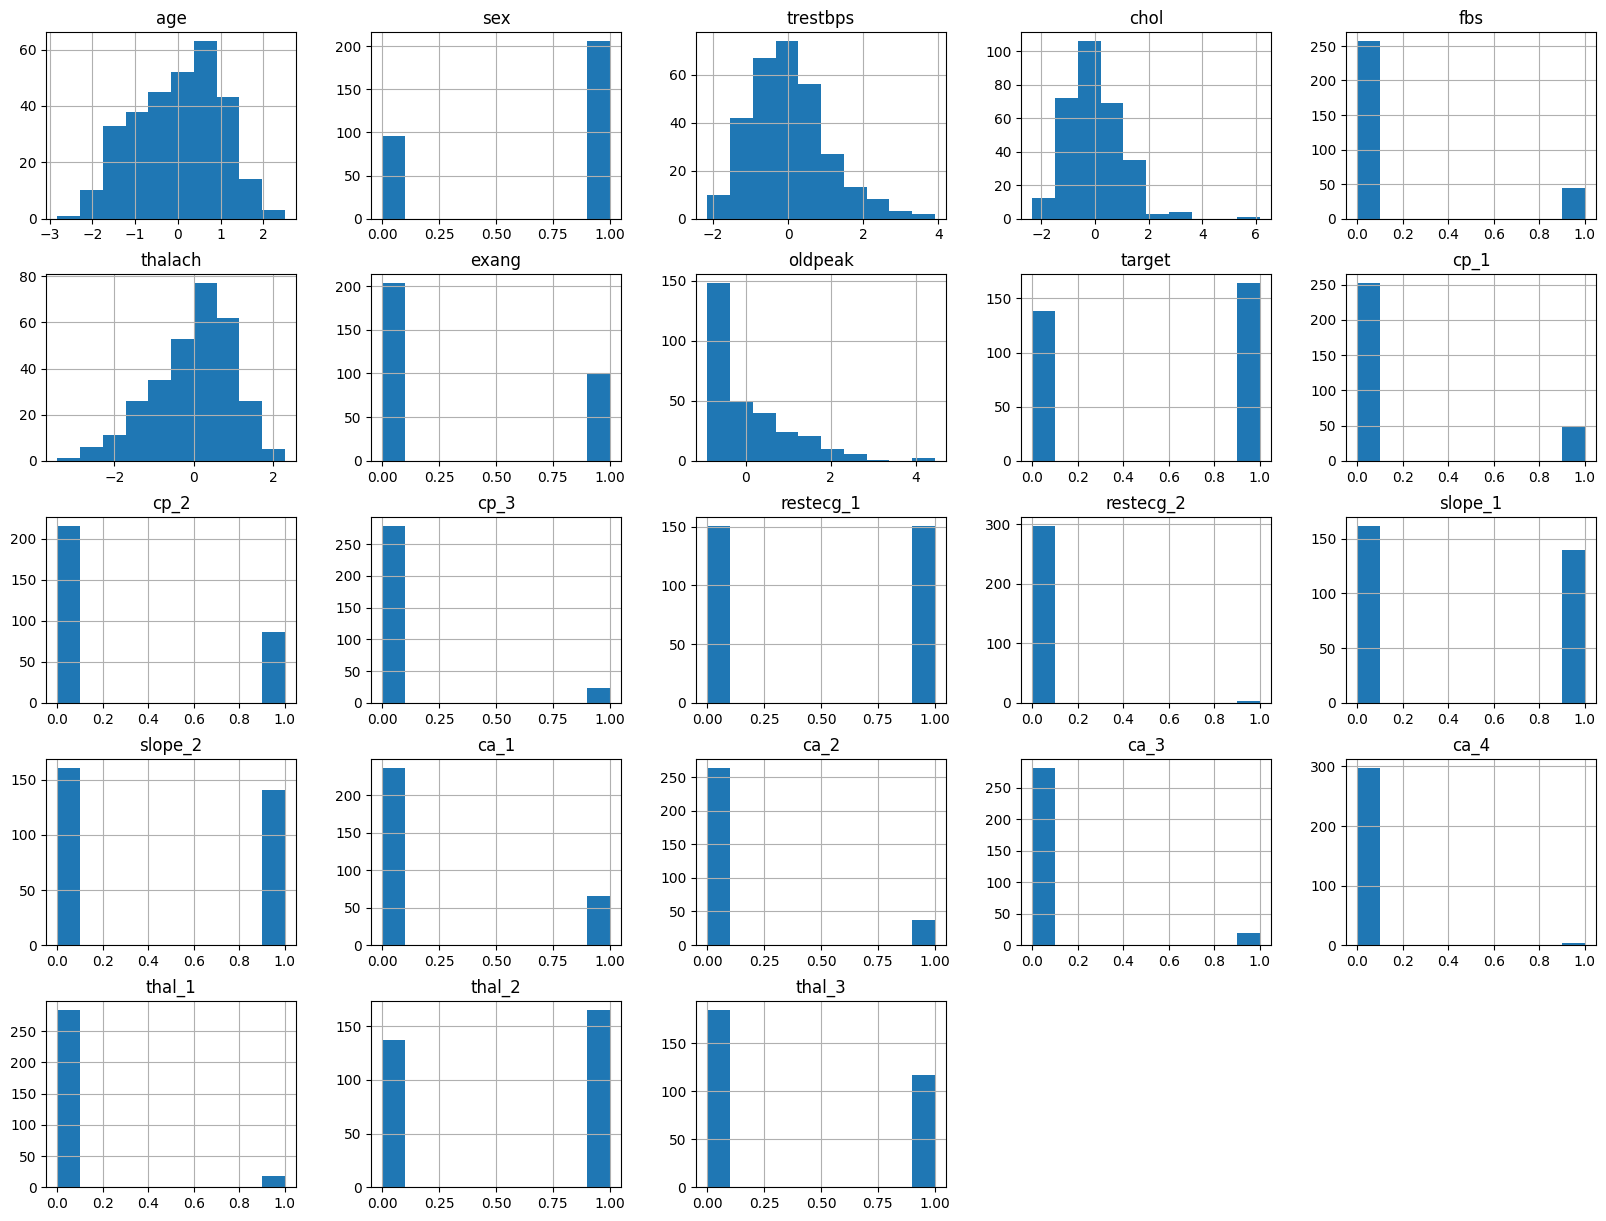

In [22]:
cleaned_data.hist(figsize=(20,15))

<Axes: xlabel='age', ylabel='chol'>

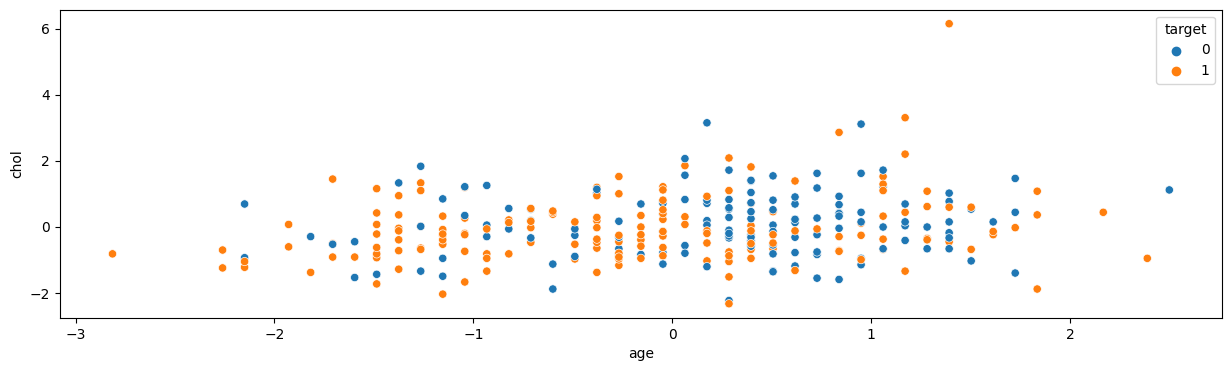

In [23]:
plt.figure(figsize=(15,4))
sns.scatterplot(x=cleaned_data.age,y=cleaned_data.chol,data=cleaned_data,hue=cleaned_data.target)

<Axes: xlabel='age', ylabel='target'>

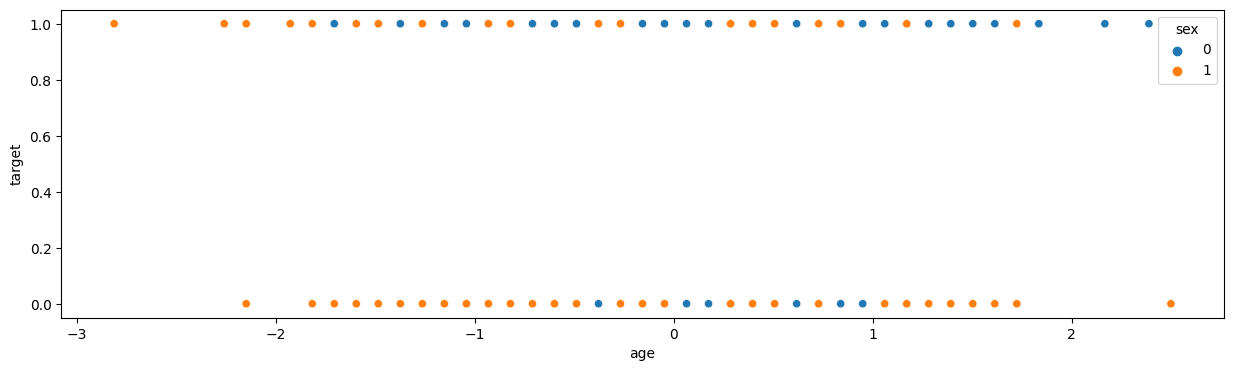

In [24]:
plt.figure(figsize=(15,4))
sns.scatterplot(x=cleaned_data.age,y=cleaned_data.target,data=cleaned_data,hue=cleaned_data.sex)

Correlation visualization


<Axes: >

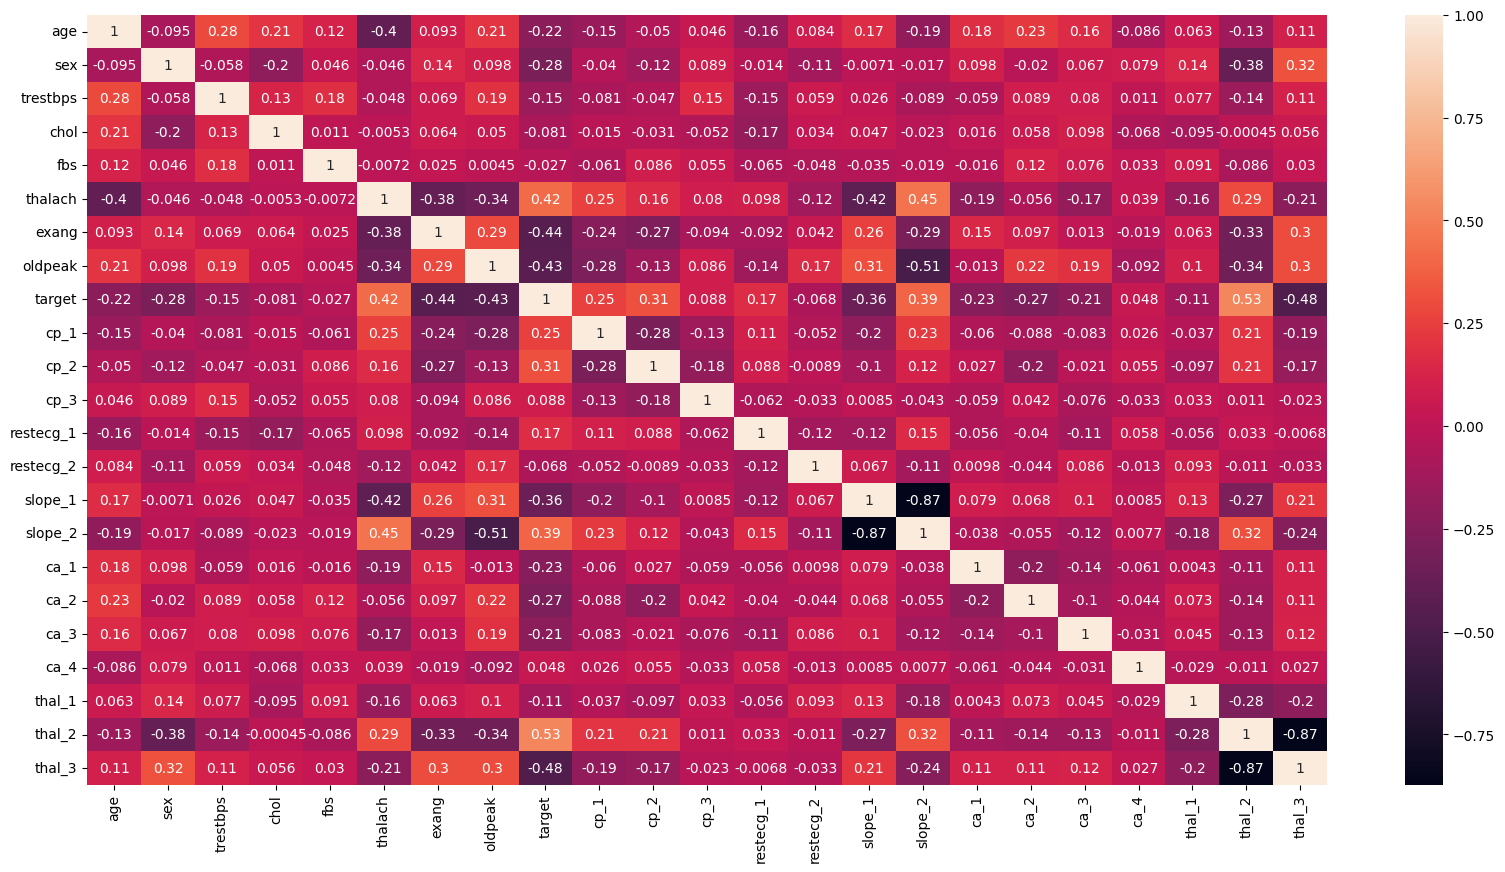

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(cleaned_data.corr(),annot=True,)

# Define X & Y

In [26]:
y = cleaned_data['target']


In [27]:
y.shape

(302,)

In [28]:
x= cleaned_data.drop('target',axis=1)

In [29]:
x.shape

(302, 22)

# Split our data

In [30]:
import sklearn.model_selection as sm

In [31]:
xtrain,xtest,ytrain,ytest = sm.train_test_split(x,y,test_size=0.2,random_state=20)

In [32]:
ytrain.shape

(241,)

In [33]:
xtrain.shape

(241, 22)

In [34]:
ytest.shape

(61,)

In [35]:
xtest.shape

(61, 22)

# Logistic Regression

In [36]:
import sklearn.linear_model as sl

In [37]:
LR = sl.LogisticRegression(random_state=20)

In [38]:
LR.fit(xtrain,ytrain)

LogisticRegression(random_state=20)

Logistic regression scores

In [39]:
LR.score(xtrain,ytrain)

0.8713692946058091

In [40]:
LR.score(xtest,ytest)

0.9016393442622951

Predicting values

In [41]:
ypredicted = LR.predict(xtest)

  Visualize our prediction

<Axes: ylabel='target'>

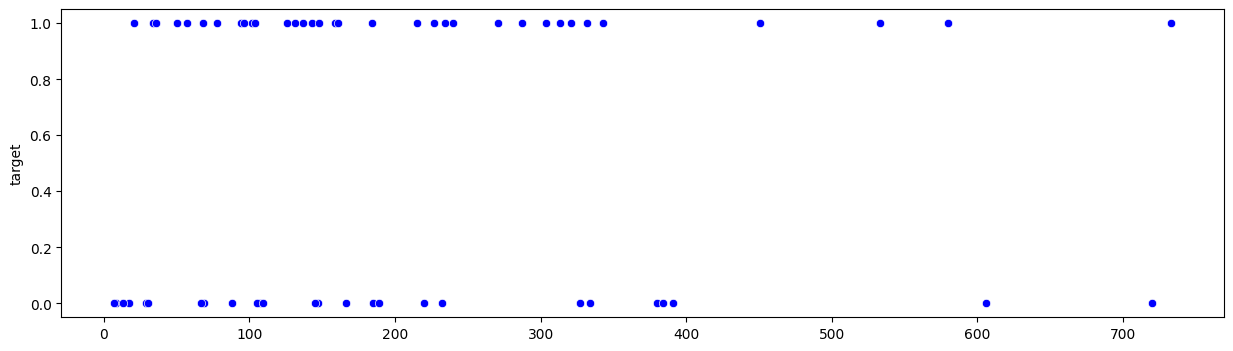

In [42]:
plt.figure(figsize=(15,4))
sns.scatterplot(x=xtest.index,y=ytest,c= 'b',)




<Axes: >

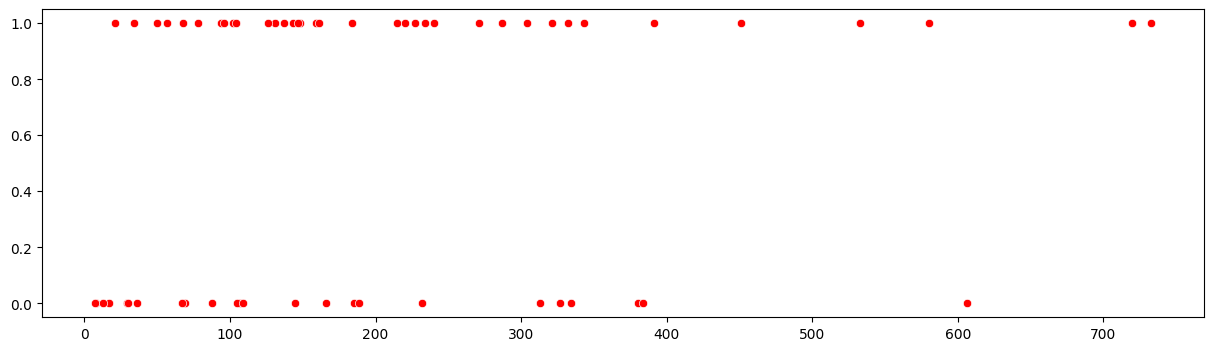

In [43]:
plt.figure(figsize=(15,4))
sns.scatterplot(x=xtest.index,y=ypredicted,c= 'r')


<Axes: ylabel='target'>

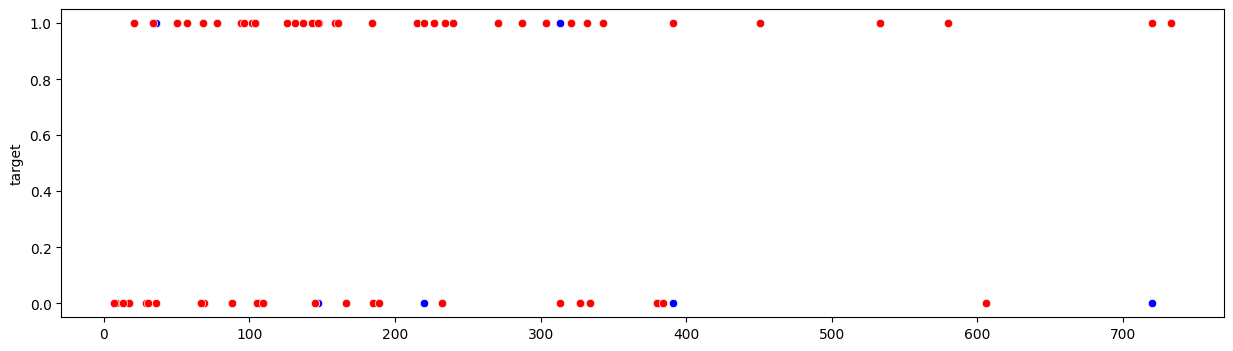

In [44]:
plt.figure(figsize=(15,4))
sns.scatterplot(x=xtest.index,y=ytest,c= 'b')
sns.scatterplot(x=xtest.index,y=ypredicted,c= 'r')

Accuracy metrics

In [45]:
import sklearn.metrics as sme

In [46]:
cm= sme.confusion_matrix(ytest,ypredicted)


<Axes: >

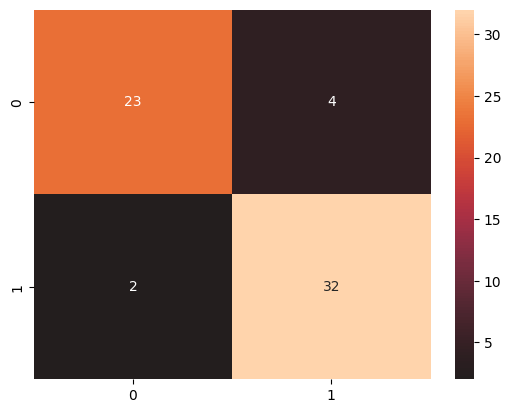

In [47]:
sns.heatmap(cm,annot=True,center=True,)

In [48]:
class_report_DF =pd.DataFrame( sme.classification_report(y_true=ytest,y_pred=ypredicted,output_dict=True))
class_report_DF

,0,1,accuracy,macro avg,weighted avg
precision,0.920000,0.888889,0.901639,0.904444,0.902659
recall,0.851852,0.941176,0.901639,0.896514,0.901639
f1-score,0.884615,0.914286,0.901639,0.899451,0.901153
support,27.000000,34.000000,0.901639,61.000000,61.000000


<Axes: >

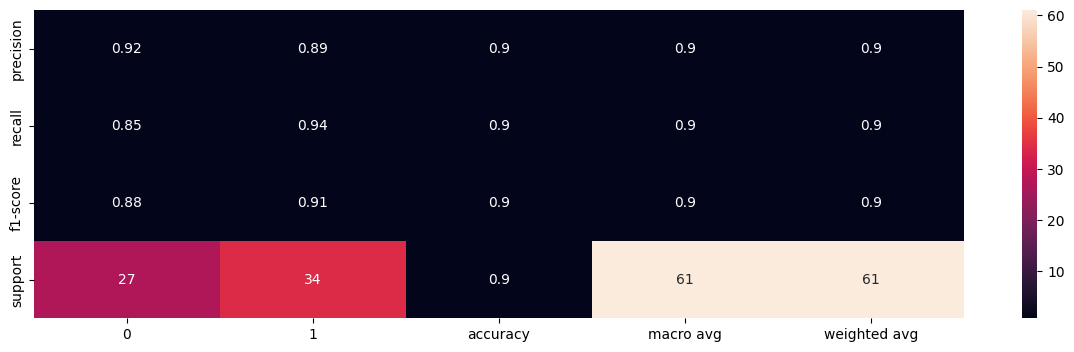

In [49]:
plt.figure(figsize=(15,4))
sns.heatmap(class_report_DF,annot=True)

# Using SVM


In [50]:
import sklearn.svm as ssv

In [84]:
svm_classifier = ssv.SVC(C=0.56,kernel='linear')

In [85]:
svm_classifier.fit(X=xtrain,y=ytrain)

SVC(C=0.56, kernel='linear')

In [86]:
svm_classifier.score(xtrain,ytrain)

0.8630705394190872

In [87]:
ysvm_predicted = svm_classifier.predict(xtest)

In [88]:
svm_classifier.score(xtest,ytest)

0.8524590163934426

<Axes: ylabel='target'>

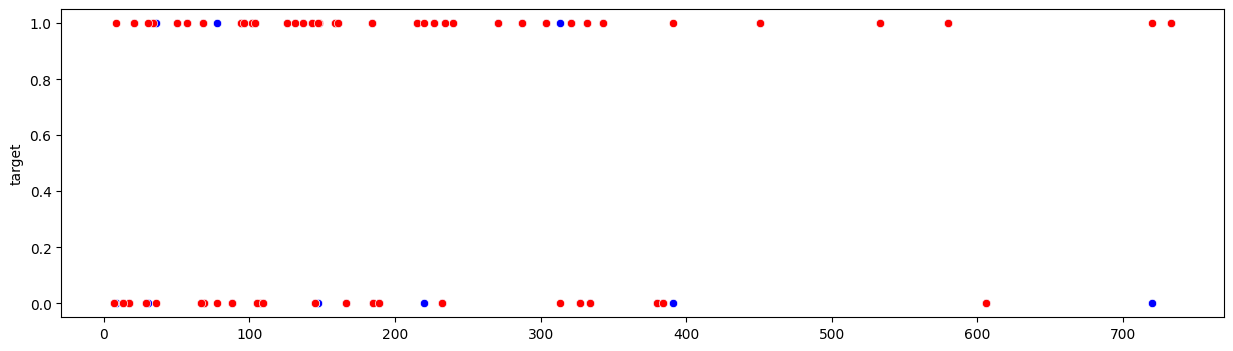

In [89]:
plt.figure(figsize=(15,4))
sns.scatterplot(x=xtest.index,y=ytest,c= 'b')
sns.scatterplot(x=xtest.index,y=ysvm_predicted,c= 'r')

In [90]:
svm_cm= sme.confusion_matrix(ytest,ypredicted)

<Axes: >

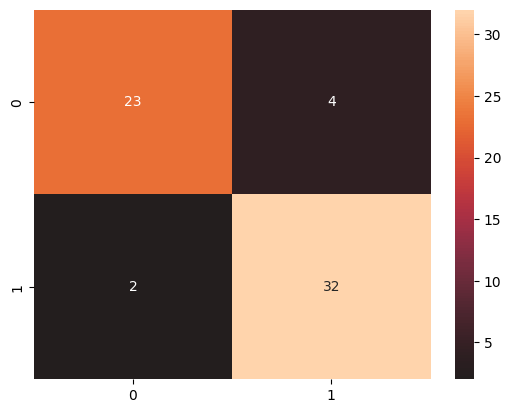

In [91]:
sns.heatmap(svm_cm,annot=True,center=True,)

In [92]:
svm_class_report_DF =pd.DataFrame( sme.classification_report(y_true=ytest,y_pred=ypredicted,output_dict=True))
svm_class_report_DF

,0,1,accuracy,macro avg,weighted avg
precision,0.920000,0.888889,0.901639,0.904444,0.902659
recall,0.851852,0.941176,0.901639,0.896514,0.901639
f1-score,0.884615,0.914286,0.901639,0.899451,0.901153
support,27.000000,34.000000,0.901639,61.000000,61.000000


<Axes: >

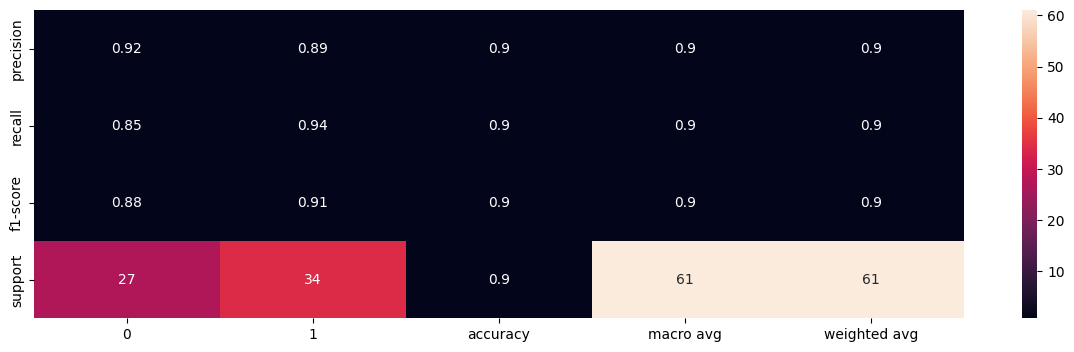

In [93]:
plt.figure(figsize=(15,4))
sns.heatmap(svm_class_report_DF,annot=True)